In [1]:
%matplotlib inline
import xarray as xr
from pfio import pfread, pfwrite
import numpy as np
import os
import glob
import math
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
from IPython.display import HTML
from GaugeLocator import find_pftcl_file, get_runname_from_pftcl, get_pressure_files
matplotlib.rcParams['animation.embed_limit'] = 2**128

In [2]:
PATH_TO_PF_OUTPUTS = '/home/arezaii/git/subset_1/run_output'

In [3]:
pftcl = find_pftcl_file(PATH_TO_PF_OUTPUTS)
runname = get_runname_from_pftcl(pftcl)
pressure_files = get_pressure_files(PATH_TO_PF_OUTPUTS, runname)

In [4]:
pressures = []
top_layer = -1
for p_file in pressure_files:        
        #ts = int(p_file.split('.')[-2])
        np_array = np.flip(pfread(p_file),axis=1)
        np_array[np_array<=-3.4e38]=np.nan
        pressure_data = xr.DataArray(np_array[top_layer,:,:],dims=['j','i'])        
        #print(pressure_data.sizes)
        pressures.append(pressure_data)
combined = xr.concat(pressures, 'timestep')
del(pressures)

In [5]:
i_dim = math.ceil(10 * (combined.sizes['i']/combined.sizes['j']) )
j_dim = math.ceil(10 * (combined.sizes['j']/combined.sizes['i']))
dims = (j_dim, i_dim)

#for i in range(combined.sizes['timestep']):
    #fig = combined[i,:,:].plot(figsize=dims)    

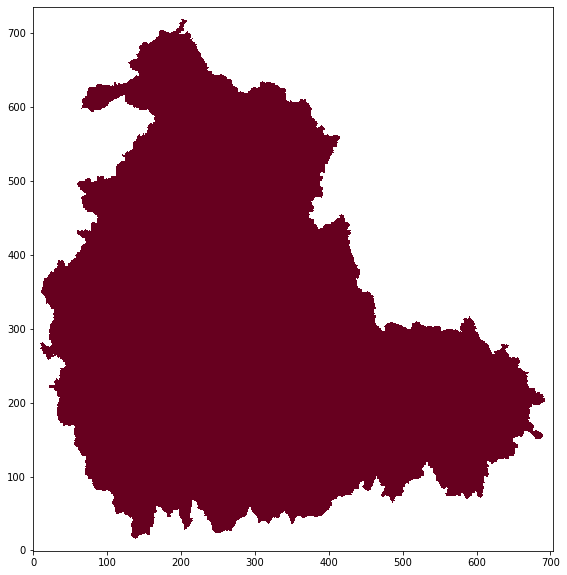

In [13]:
fig = plt.figure(figsize=dims)
# ax = fig.add_subplot(111)
# div = make_axes_locatable(ax)
# cax = div.append_axes('right', '5%', '5%')
ims = []

for i in range(combined.sizes['timestep']):
    im = [plt.imshow(combined[i,:,:], animated=True, origin='lower', cmap='RdBu')]    
    im[0].set_clim(-1, 5)
    ims.append(im)


anim = animation.ArtistAnimation(fig, ims, blit=True, interval=1000, repeat_delay=5000)
#plt.gca().invert_yaxis()
#plt.colorbar()
#cb = fig.colorbar(ims, cax=cax)
#tx = ax.set_title('Frame 0')
HTML(anim.to_jshtml()) # thanks to http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/

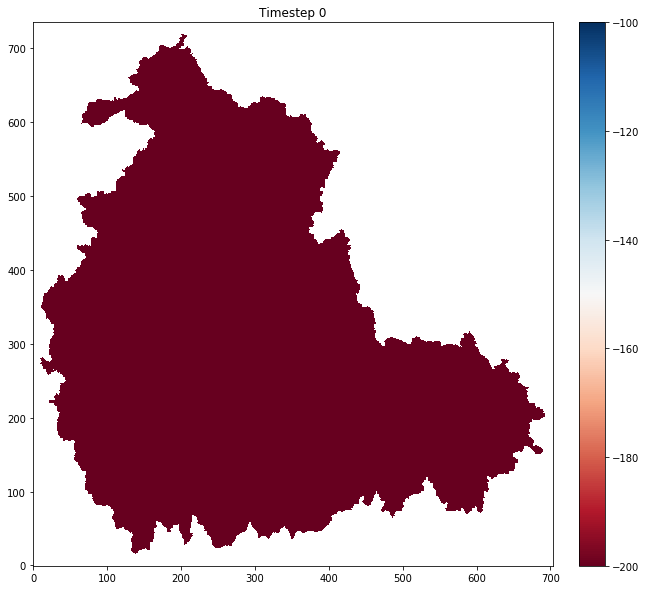

In [16]:


fig = plt.figure(figsize=dims)
ax = fig.add_subplot(111)

div = make_axes_locatable(ax)
cax = div.append_axes('right', '5%', '5%')

frames = []
for i in range(combined.sizes['timestep']):    
    curVals  = combined[i,:,:]
    frames.append(curVals)
    
vmin=-200
vmax=-100
cv0 = frames[0]
im = ax.imshow(cv0, origin='lower', cmap='RdBu')
cb = fig.colorbar(im, cax=cax)
tx = ax.set_title('Frame 0')

def animate(i):
    arr = frames[i]    
    im.set_data(arr)
    im.set_clim(vmin, vmax)
    tx.set_text('Timestep {0}'.format(i))

ani = animation.FuncAnimation(fig, animate, frames=combined.sizes['timestep'], interval=750)
HTML(ani.to_jshtml())

In [8]:
Writer = animation.writers['ffmpeg']
writer = Writer(metadata=dict(artist='Ahmad Rezaii'), bitrate=1800)
ani.save('im.mp4', writer=writer)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [9]:
# x= combined[]

# cax = ax.pcolormesh(x, y, G[:-1, :-1, 0],
#                     vmin=-1, vmax=1, cmap='Blues')
# fig.colorbar(cax)
 
# def animate(i):
#      cax.set_array(G[:-1, :-1, i].flatten())